In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
import os
path = os.getcwd() +'/data/mnist_train.csv'
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data.shape   # number of data sets and numbers of pixels or features in the data

(450, 785)

In [41]:
cols=data.shape[1]
print("columns = {}".format(cols))

columns = 785


In [42]:
y=np.array(data.iloc[:,:1])
x=np.array(data.iloc[:,1:cols])

In [43]:
x.shape, y.shape

((450, 784), (450, 1))

In [44]:
b = np.unique(y)  #finding all unique classes in the output

In [45]:
print(b)

[0 1 2 3]


In [46]:
b = b.size
print(b)

4


In [47]:
rows = x.shape[0] #Finding the number of Rows (data samples)
x = np.insert(x, 0, values=np.ones(rows), axis=1) #inserting ones into x

x.shape

(450, 785)

In [48]:
params = x.shape[1] #Finding the number of features
all_theta = np.zeros((b, params)) # here 4 denotes number of labels (0 to 3)
#all_theta = np.matrix(all_theta)
all_theta.shape 

(4, 785)

In [49]:
def sigmoid(z):    #returns values between zero to one
    return 1 / (1 + np.exp(-z))

In [50]:
def computeCost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    #(-y*log(g(z))) --> when expected output (y)=1
    first = np.multiply(-y, np.log(sigmoid(x * theta.T))) 
    
    #((1-y)*(1-log(g(z)))) --> when expected output (y)=0
    second = np.multiply((1 - y), np.log(1 - sigmoid(x * theta.T)))
    
    cost = np.sum(first - second)
    cost = cost/(2*len(x))
                 
    return cost

In [51]:
cost= computeCost(all_theta, x, y)
print("cost = {}".format(cost))

cost = 1.3862943611198904


In [52]:
learning_rate=1
def gradient(theta, x, y):
    
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.shape[1])
    
    error = sigmoid(x * theta.T) - y
    grad = ((x.T * error) / len(x))
    grad = grad * learning_rate
    return grad

In [53]:
from scipy.optimize import minimize
def one_vs_all(x, y, classes, new_theta):
    params = x.shape[1]
    rows = x.shape[0]
      
    for i in range(0, classes):
        theta = new_theta[i,:]
        y_i = np.array([1 if label == i else 0 for label in y]) 
        y_i = np.reshape(y_i, (rows, 1))
                
        # minimize the objective function  --> Gradient descent
        fmin = minimize(fun=computeCost, x0=theta, args=(x, y_i), method='TNC', jac=gradient)
        all_theta[i,:] = fmin.x
    
    return all_theta

In [54]:
classes = b
new_theta = one_vs_all(x, y, classes, all_theta)

D:\Softwares\ML Software\Lema Labs ML Workshop_x64\Lema Labs ML Workshop x64\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Softwares\ML Software\Lema Labs ML Workshop_x64\Lema Labs ML Workshop x64\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [55]:
print(new_theta)

[[-3.91631067e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.64632714e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.22527580e-04  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.83615149e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [56]:
computeCost(new_theta, x, y)

30.141943584355943

In [57]:
def predict_all(x, theta): 
   
    # convert to matrices
    x = np.matrix(x)
    theta = np.matrix(theta)
    
    # compute the class probability for each class on each training instance
    h = sigmoid(x * theta.T)
    
    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)
    
    return h_argmax, h

In [58]:
y_pred, h = predict_all(x, new_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Training data={} %".format(accuracy * 100))
print ("confidence={} %".format(h * 100))

Training data=100.0 %
confidence=[[5.09044697e-04 2.00760099e-04 9.82542571e+01 2.58951562e-08]
 [1.59838191e-05 9.99751429e+01 1.88678357e-02 7.78612901e-06]
 [3.31242288e-06 5.90259453e-06 9.83672732e+01 7.30954564e-04]
 ...
 [3.46608494e-04 5.23729976e-06 9.90471969e+01 2.66308359e-03]
 [4.77564296e-02 5.30291238e-08 9.99986825e+01 1.07860727e-15]
 [2.16408168e-05 9.99992553e+01 3.17618378e-02 4.09989394e-10]] %


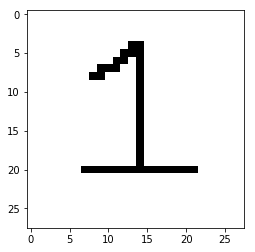

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

img = pltimg.imread('data/pic.png')     
gray = rgb2gray(img)

plt.imshow(img)

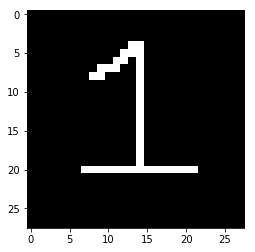

In [60]:
#convert image to array to invert 
grarray = np.asarray(gray)

#converting grayscale to black or white 
#black --> 255
bw = (grarray < (grarray.mean()))*255
#convert array to 28*28 image
bw=np.reshape(bw, (28,28))

plt.imshow(bw,cmap=plt.cm.gray)

In [61]:
bw= np.asarray(bw)
bw= bw.reshape(1,-1)
brows=bw.shape[0]
bw = np.insert(bw, 0, values=np.ones(brows), axis=1)

In [62]:
pred, h = predict_all(bw, new_theta)
print(pred)
print ("confidence={} %".format(h))
print ("confidence={} %".format(h[0,pred] * 100))

[[1]]
confidence=[[1.39159936e-05 8.97195019e-02 1.56267152e-02 8.01331496e-03]] %
confidence=[[8.97195019]] %


In [66]:
if pred == [0]:
    print ("The number is Zero" + str(h[0,pred] *100) + " % confidence")
elif pred ==[1]:
    print ("The number is One with " + str(h[0,pred] *100) + " % confidence")
elif pred == [2]:
    print ("The number is Two"+ str(h[0,pred] *100) + " % confidence")
elif pred == [3]:
    print ("The number is Three"+ str(h[0,pred] *100) + " % confidence")
else:
    print ("This is not Magic")

The number is One with [[8.97195019]] % confidence
